# Cliff Walking

![title](cliff_walking_pic.png)

# Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# House Keeping

In [2]:
# Set seed
np.random.seed(802)

# Grid size
grid_rows = 4
grid_cols = 12

# Locations
start = [3, 0]
goal = [3, 11]

# Action set 0=Up 1=Down 2=Left 3=Right
actions = range(4)

# Reward at Each Step
reward = -1

# Step Size
alpha = 0.5

# Exploration Rate
epsilon = 0.1

# Set number of episodes to run
episodes = 500

# Q Tables

In [3]:
q_table_sarsa = np.zeros([grid_rows, grid_cols, len(actions)])
q_table_ql = np.zeros([grid_rows, grid_cols, len(actions)])

# Step Function

In [4]:
def step(state, action):
    
    rownum, colnum = state
    reward = -1
    
    # 0=Up
    if action==0:
        rownum = max( rownum -1, 0 )
    
    # 1=Down
    elif action==1:
        rownum = min( rownum +1, grid_rows-1 )
    
    # 2=Left
    elif action==2:
        colnum = max( colnum -1, 0 )
    
    # 3=Right
    else:
        colnum = min( colnum +1, grid_cols-1 )
        
    # Restart Position if Agent Moves Off Cliff
    if ( rownum==(grid_rows-1) ) & ( colnum in range(1,grid_cols-1) ):
        rownum = start[0]
        colnum = start[1]
        reward = -100
        
    return [rownum, colnum, reward]

# Greedy Action Function

In [5]:
def greedy(state, q_table, epsilon):
    
    # Randomly select action with probability epsilon
    if np.random.uniform() < epsilon:
        g_action = np.random.choice(actions)
        
    # Select the best action for the given state with probability 1-epsilon
    else:
        q_vals = q_table[state[0], state[1], :]
        q_vals_max = np.where(q_vals==q_vals.max())[0]
        g_action = np.random.choice(q_vals_max)
    
    return g_action

# SARSA

In [6]:
# Store the steps to reach the goal for each episode
steps_vec_sarsa = []
reward_vec_sarsa = []

# SARSA
for i in range(episodes):
    
    # Count steps and sum total reward per episode
    steps_count = 0
    reward_total = 0
    
    # Always start in the same position
    state = start
    
    # Choose action based on epsilon-greedy
    action = greedy(state, q_table_sarsa, epsilon)
    
    # Loop until the goal is reached
    while state!=goal:
        
        # Find next state and reward given current state and action
        new_s_r = step(state, action)
        new_state = new_s_r[:2]
        reward = new_s_r[2]
        
        # Choose action based on epsilon-greedy
        new_action = greedy(new_state, q_table_sarsa, epsilon)
        
        # Update the q-table with SARSA
        q_table_sarsa[state[0],state[1],action] = q_table_sarsa[state[0],state[1],action] + \
            alpha * ( reward + q_table_sarsa[new_state[0],new_state[1],new_action] - \
                q_table_sarsa[state[0],state[1],action] )
        
        # Set new state to current state and new action to current action
        state = new_state
        action = new_action
        
        # Update steps count and reward total
        steps_count += 1
        reward_total += reward
        
    # Save steps and total reward per episode
    steps_vec_sarsa.append(steps_count)
    reward_vec_sarsa.append(reward_total)

# Q-Learning

In [7]:
# Store the steps to reach the goal for each episode
steps_vec_ql = []
reward_vec_ql = []

# Q-Learning
for i in range(episodes):
    
    # Count steps and sum total reward per episode
    steps_count = 0
    reward_total = 0
    
    # Always start in the same position
    state = start
    
    # Loop until the goal is reached
    while state!=goal:
        
        # Choose action based on epsilon-greedy
        action = greedy(state, q_table_ql, epsilon)
        
        # Find next state and reward given current state and action
        new_s_r = step(state, action)
        new_state = new_s_r[:2]
        reward = new_s_r[2]
        
        # Update the q-table with Q-Learning
        q_table_ql[state[0],state[1],action] = q_table_ql[state[0],state[1],action] + \
            alpha * ( reward + max(q_table_ql[new_state[0],new_state[1],]) - \
                q_table_ql[state[0],state[1],action] )
        
        # Set new state to current state
        state = new_state
        
        # Update steps count and reward total
        steps_count += 1
        reward_total += reward
        
    # Save steps and total reward per episode
    steps_vec_ql.append(steps_count)
    reward_vec_ql.append(reward_total)

# View SARSA and Q-Learning Results

In [8]:
min_steps_sarsa = grid_cols + 1
optimal_path_count_sarsa = sum(np.array(steps_vec_sarsa)==min_steps_sarsa)
print("The agent followed the optimal path", 100*optimal_path_count_sarsa/episodes, "% of the time with SARSA.")

min_steps_ql = grid_cols + 1
optimal_path_count_ql = sum(np.array(steps_vec_ql)==min_steps_ql)
print("The agent followed the optimal path", 100*optimal_path_count_ql/episodes, "% of the time with Q-Learning.")

The agent followed the optimal path 0.0 % of the time with SARSA.
The agent followed the optimal path 29.6 % of the time with Q-Learning.


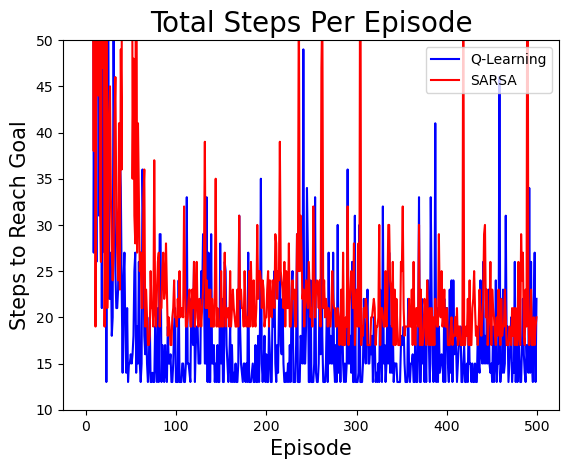

In [9]:
plt.plot(steps_vec_ql, color="blue", label="Q-Learning")
plt.plot(steps_vec_sarsa, color="red", label="SARSA")
plt.title("Total Steps Per Episode", fontsize=20)
plt.xlabel("Episode", fontsize=15)
plt.ylabel("Steps to Reach Goal", fontsize=15)
plt.ylim(10,50)
plt.legend(loc="upper right")
plt.show()

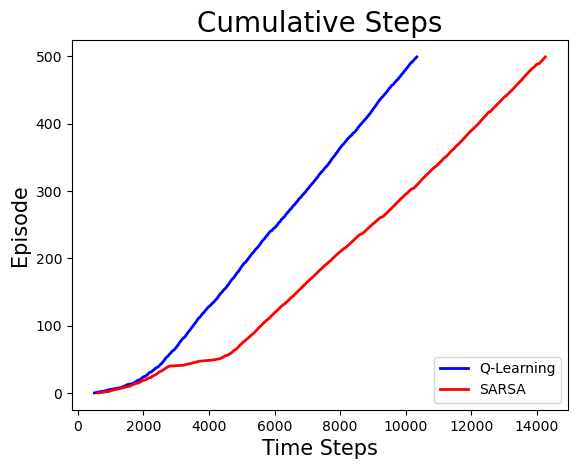

In [10]:
plt.plot(np.cumsum(steps_vec_ql), range(episodes), color="blue", lw=2, label="Q-Learning")
plt.plot(np.cumsum(steps_vec_sarsa), range(episodes), color="red", lw=2, label="SARSA")
plt.title("Cumulative Steps", fontsize=20)
plt.xlabel("Time Steps", fontsize=15)
plt.ylabel("Episode", fontsize=15)
plt.legend(loc="lower right")
plt.show()

In [11]:
print("The average reward for SARSA is", sum(reward_vec_sarsa) / len(reward_vec_sarsa))
print("The average reward for Q-learning is", sum(reward_vec_ql) / len(reward_vec_ql))

The average reward for SARSA is -38.612
The average reward for Q-learning is -58.096


In [12]:
# Graphic of the Total Reward Moving Average
def mov_ave(vec,obs):
    
    MA = []
    for i in range( len(vec)-(obs-1) ):
        MA.append( sum(vec[i:(i+obs)])/obs )
    
    return MA

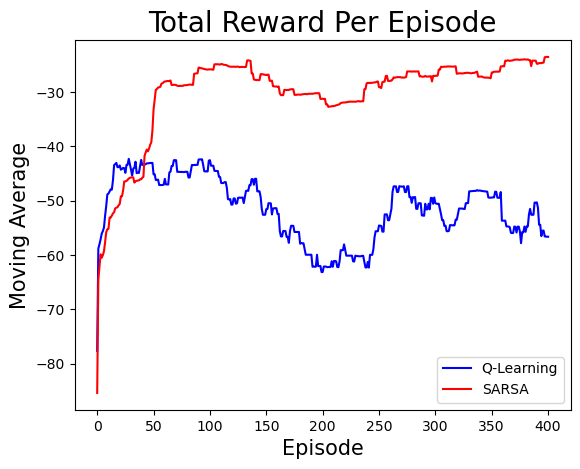

In [13]:
MA_window = 100 
plt.plot(mov_ave(reward_vec_ql, MA_window), color="blue", label="Q-Learning")
plt.plot(mov_ave(reward_vec_sarsa, MA_window), color="red", label="SARSA")
plt.title("Total Reward Per Episode", fontsize=20)
plt.xlabel("Episode", fontsize=15)
plt.ylabel("Moving Average", fontsize=15)
plt.legend(loc="lower right")
plt.show()

# Optimal Paths

In [14]:
optimal_policy_ql = np.zeros([grid_rows,grid_cols], dtype=str)

for i in range(grid_rows):
    for j in range(grid_cols):
        direction = np.argmax(q_table_ql[i,j,:])
        if direction==0:
            optimal_policy_ql[i,j]="U"
        elif direction==1:
            optimal_policy_ql[i,j]="D"
        elif direction==2:
            optimal_policy_ql[i,j]="L"
        else:
            optimal_policy_ql[i,j]="R"

optimal_policy_ql[goal[0],goal[1]] = "G"
optimal_policy_ql

array([['R', 'U', 'R', 'D', 'R', 'D', 'D', 'D', 'D', 'R', 'D', 'D'],
       ['R', 'D', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D'],
       ['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D'],
       ['U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'G']],
      dtype='<U1')

In [15]:
optimal_policy_sarsa = np.zeros([grid_rows,grid_cols], dtype=str)

for i in range(grid_rows):
    for j in range(grid_cols):
        direction = np.argmax(q_table_sarsa[i,j,:])
        if direction==0:
            optimal_policy_sarsa[i,j]="U"
        elif direction==1:
            optimal_policy_sarsa[i,j]="D"
        elif direction==2:
            optimal_policy_sarsa[i,j]="L"
        else:
            optimal_policy_sarsa[i,j]="R"

optimal_policy_sarsa[goal[0],goal[1]] = "G"
optimal_policy_sarsa

array([['R', 'U', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D'],
       ['R', 'R', 'U', 'U', 'R', 'U', 'R', 'R', 'U', 'U', 'R', 'D'],
       ['U', 'R', 'U', 'U', 'R', 'R', 'U', 'R', 'U', 'U', 'R', 'D'],
       ['U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'G']],
      dtype='<U1')

In [16]:
##########################################################################################
# Change epsilon to 0.001 and rerun the program
# When epsilon approaches 0 SARSA will converge to the optimal fast policy along the cliff
##########################################################################################